# Projeto Final  - INF-0612 

Paulo Roberto de Almeida Costa

# Hor√°rio de Ver√£o

Os hor√°rios est√£o formatados no fuso hor√°rio local, o que √© muito pr√°tico para humanos, mas possivelmente problem√°tico para m√°quinas.

Por exemplo, existem descontinuidades quando o hor√°rio de ver√£o come√ßa ou termina. Em particular, o intervalo 23:00-23:59 ocorre 2 vezes no √∫ltimo dia de hor√°rio de ver√£o, e √© sempre problem√°tico.

Vamos analisar esses momentos de mudan√ßa:

In [25]:
time_window <- function(dataframe, from, to) {
    dataframe[
        dataframe$Time >= strptime(from, "%d/%m/%Y-%H:%M", tz = 'America/Sao_Paulo') & dataframe$Time <= strptime(to, "%d/%m/%Y-%H:%M", tz = 'America/Sao_Paulo'), 
    ]
}

#time_window(cepagri, "21/02/2015-22:50", "22/02/2015-00:10")
time_window(cepagri, "17/10/2015-23:50", "18/10/2015-02:10")
time_window(cepagri, "20/02/2016-22:50", "21/02/2016-00:10")
#time_window(cepagri, "15/10/2016-23:50", "16/10/2016-02:10")
#time_window(cepagri, "18/02/2017-22:50", "19/02/2017-00:10")
#time_window(cepagri, "20/10/2017-23:50", "21/10/2017-02:10")

Time                Temperature Wind Humidity Apparent.Temperature
83380 2015-10-17 23:50:00 18.8        86.6 70.3     17.4                
83381 2015-10-18 01:00:00 18.7        87.7 70.5     17.3                
83382 2015-10-18 01:10:00   NA          NA   NA       NA                
83383 2015-10-18 01:20:00   NA          NA   NA       NA                
83384 2015-10-18 01:30:00   NA          NA   NA       NA                
83385 2015-10-18 01:40:00   NA          NA   NA       NA                
83386 2015-10-18 01:50:00   NA          NA   NA       NA                
83387 2015-10-18 02:00:00   NA          NA   NA       NA                
83388 2015-10-18 02:10:00   NA          NA   NA       NA

Time                Temperature Wind Humidity Apparent.Temperature
101073 2016-02-20 22:50:00 25.1         7.8 81.7     24.0                
101074 2016-02-20 23:00:00 25.1         7.8 81.7     24.0                
101075 2016-02-20 23:10:00 23.6        20.3 90.2     22.5                
101076 2016-02-20 23:20:00 23.0        28.8 92.1     21.9                
101077 2016-02-20 23:30:00 22.5        25.9 93.5     21.4                
101078 2016-02-20 23:40:00 22.4        27.1 96.0     21.3                
101079 2016-02-20 23:50:00 21.8        26.4 96.5     20.7                
101080 2016-02-20 23:00:00 21.4        24.7 96.0     20.3                
101081 2016-02-20 23:10:00   NA          NA   NA       NA                
101082 2016-02-20 23:20:00   NA          NA   NA       NA                
101083 2016-02-20 23:30:00   NA          NA   NA       NA                
101084 2016-02-20 23:40:00   NA          NA   NA       NA                
101085 2016-02-20 23:50:00   NA          NA   NA       NA                
101086 2016-02-21 00:00:00   NA          NA   NA       NA                
101087 2016-02-21 00:10:00   NA          NA   NA       NA

Nas tabelas acima, podemos ver que ocorrem erros quando o hor√°rio de ver√£o come√ßa ou termina. __O problema se repete todos os anos!__ (As tabelas foram omitido para redu√ß√£o de espa√ßo)

√â consenso que trabalhar com fuso-hor√°rios √© dificil e complica ainda mais quando entra o hor√°rio de ver√£o, mas estou assustado que causem problemas t√£o consistentemente neste dataset.

Quanto ao intervalo ambiguo das 23:00 a 23:59 que ocorre no √∫ltimo dia do hor√°rio de ver√£o, podemos resolver a ambiguidade adicionando 1h sempre que uma linha do dataframe "volta no tempo" em compara√ß√£o √† linha anterior.

# Limpeza dos dados

O hor√°rio de ver√£o foi uma an√°lise interessante e,uma vez que causa tantos erros, precisava ser feito antes da limpeza dos dados.

Daqui para frente, poderemos ignorar linhas com erro e remover duplicadas (Ficando apenas com a primeira ocorrencia)

# Distribui√ß√£o de dados

Como primeira an√°lise dos dados propriamente ditos, vamos visualizar as distribui√ß√µes de cada vari√°vel, e procurar por problemas com outliers.

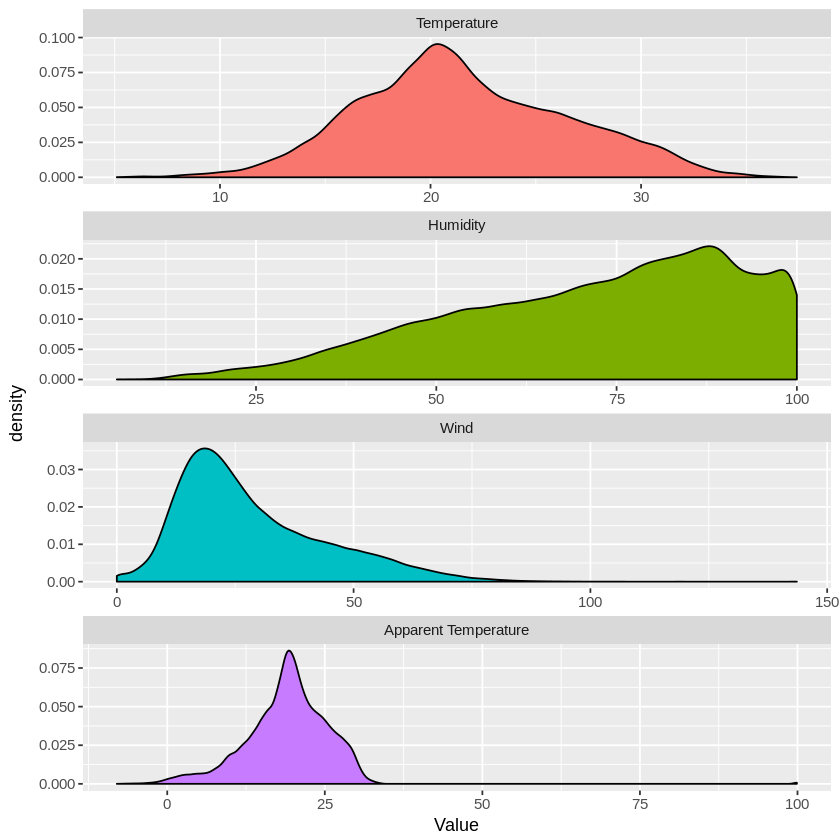

In [6]:
field_values <- rbind(
    data.frame(Attribute = 'Temperature',          Value = cepagri$Temperature),
    data.frame(Attribute = 'Humidity',             Value = cepagri$Humidity),
    data.frame(Attribute = 'Wind',                 Value = cepagri$Wind),
    data.frame(Attribute = 'Apparent Temperature', Value = cepagri$Apparent.Temperature)
)

p <- ggplot(field_values, aes(x = Value, fill = Attribute))
p <- p + facet_wrap(~ Attribute, scales = "free", ncol=1)
p <- p + geom_density()
p <- p + theme(legend.position="none")
p


Tanto a _temperatura_ quanto a _umidade_ parecem bem comportadas e dentro dos intervalos esperados, mas o _vento_ e a _sensa√ß√£o t√©rmica_  possuem outliers muito grandes que merecem investiga√ß√£o.

## Outliers de Sensa√ß√£o T√©rmica

Vamos ver uma amostra dos dias em que a _Sensa√ß√£o T√©rmica_ ultrapassou 40¬∫C

In [7]:
apparent.temperature.outliers <- cepagri[cepagri$Apparent.Temperature > 40, ]

# Show some of the outliers (Sampled 1 out of every 5 outliers for brevity)
apparent.temperature.outliers[seq(1, nrow(apparent.temperature.outliers), 5), ]

Time                Temperature Wind Humidity Apparent.Temperature
114706 2016-05-26 07:10:00 13.8        16.9  94.5    99.9                
115426 2016-05-31 07:10:00 15.7        15.5 100.0    99.9                
116136 2016-06-05 07:10:00 18.5        13.8 100.0    99.9                
116856 2016-06-10 07:10:00  6.4        11.7  97.6    99.9                
117576 2016-06-15 07:10:00  9.9        16.3  91.9    99.9                
118296 2016-06-20 07:10:00 12.2        38.4  98.4    99.9                
119016 2016-06-25 07:10:00 12.6        51.9  94.0    99.9                
119736 2016-06-30 07:10:00 14.2        27.5  82.4    99.9                
120456 2016-07-05 07:10:00 13.6         6.4  82.6    99.9                
121175 2016-07-10 07:10:00 12.9        21.9  77.2    99.9                
121895 2016-07-15 07:10:00 16.2        19.5  65.1    99.9                
122615 2016-07-20 07:10:00  8.4        12.7  97.0    99.9                
123335 2016-07-25 07:10:00 14.6        24.0  87.9    99.9                
124631 2016-08-03 07:10:00 14.6        47.7  89.9    99.9                
125351 2016-08-08 07:10:00 15.1        61.4  86.1    99.9                
126071 2016-08-13 07:10:00  8.8        26.4  92.8    99.9                
126935 2016-08-19 07:10:00 16.5        49.1  89.8    99.9                
127797 2016-08-25 07:10:00 12.8        18.5  90.1    99.9                
128517 2016-08-30 07:10:00 19.0        13.8  75.9    99.9                
129235 2016-09-04 07:10:00 17.9        17.0  89.3    99.9                
129954 2016-09-09 07:10:00 14.5        61.3  89.1    99.9                
130674 2016-09-14 07:10:00 19.8        22.5  56.0    99.9                
131391 2016-09-19 07:10:00 18.0        11.2  89.2    99.9                
132111 2016-09-24 07:10:00 16.0        65.0  78.8    99.9                
132831 2016-09-29 07:10:00 18.5        14.9  74.1    99.9                
133551 2016-10-04 07:10:00 16.9        17.5  99.2    99.9                
134271 2016-10-09 07:10:00 18.0        45.2  59.3    99.9                
134991 2016-10-14 07:10:00 20.4         9.8  95.3    99.9

Todos os outliers tem valor 99.9¬∫C e ocorram exatamente √†s 7:10, todos os dias entre Maio e Outubro de 2016. Achei esse problema hil√°rio üòÇ

N√£o posso deixar de imaginar se isso foi um error real (Cuja causa deve ser muito interessante...), ou uma pegadinha adicionada pelo professor para ser encontrada pelos alunos.

Parece que o √∫nico campo afetado por este problema √© a _Sensa√ß√£o T√©rmica_, e ele provavelmente poderia ser obtido atrav√©s de uma f√≥rmula usando os outros campos. Mas, por seguran√ßa e pregui√ßa, vou simplesmente ignorar estas linhas nas an√°lises seguintes.

## Outliers de Vento

Vamos inspecionar os momentos em que o vento ultrapassou 100km/h, usando uma janela de +/- 2 horas.

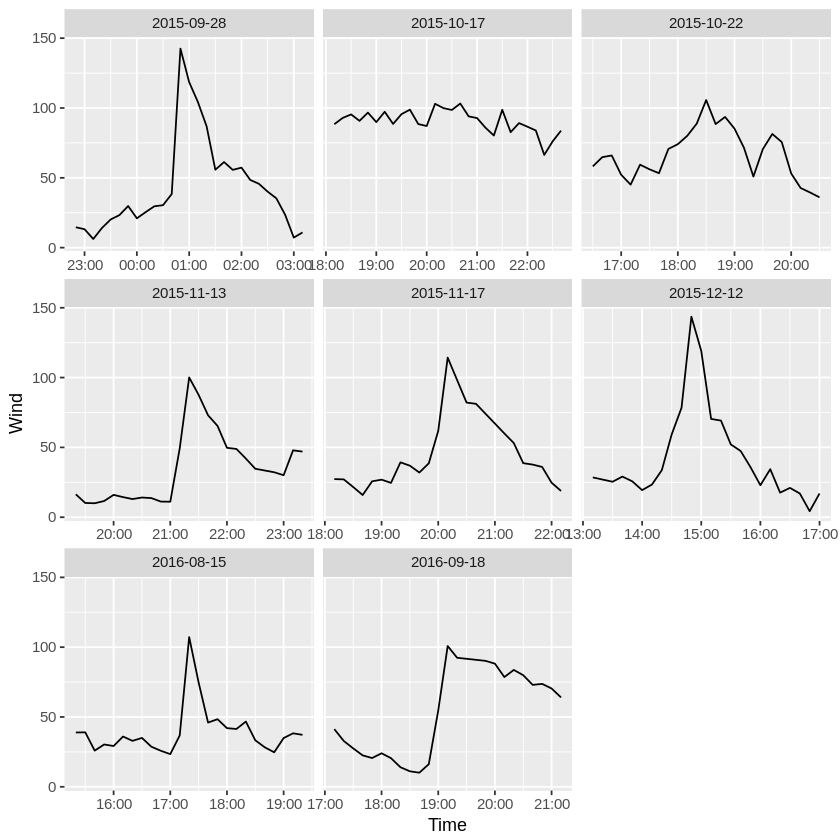

In [9]:
wind.outliers <- cepagri[cepagri$Wind > 100, ]
wind.outliers.window <- 7200  # 2 hours
wind.outliers.date_ranges <- data.frame(min=wind.outliers$Time - wind.outliers.window, max=wind.outliers$Time + wind.outliers.window)
wind.outliers.expanded <- cepagri[sapply(as.POSIXct(cepagri$Time), function(x) {any(x >= wind.outliers.date_ranges$min & x <= wind.outliers.date_ranges$max)}), ]
wind.outliers.expanded$group <- NA

# Split each high-wind day into a separate group
wind.outliers.expanded$Group[1] <- 1
for (i in 2:nrow(wind.outliers.expanded)) {
    if (wind.outliers.expanded$Time[i] > 2*wind.outliers.window + wind.outliers.expanded$Time[i - 1]) {
        wind.outliers.expanded$Group[i] <- wind.outliers.expanded$Group[i-1] + 1
    } else {
        wind.outliers.expanded$Group[i] <- wind.outliers.expanded$Group[i-1]
    }
}

wind.outliers.group.time <- aggregate(as.POSIXct(wind.outliers.expanded$Time), list(Group = wind.outliers.expanded$Group), median)$x
wind.outliers.expanded$GroupTime <- wind.outliers.group.time[ wind.outliers.expanded$Group ]

p <- ggplot(wind.outliers.expanded, aes(y = Wind, x = Time, fill = as.factor(Group)))
p <- p + facet_wrap( ~ strftime(GroupTime, "%Y-%m-%d"), scales = "free_x")
p <- p + geom_line()
p <- p + theme(legend.position="none")
p

Estes gr√°ficos parecem normais, e eu acredito que estes foram simplesmente momentos de __muito__ vento, sem qualquer problema na coleta dos dados.

Mas devo admitir que fiquei surpreso ao n√£o encontrar a Microexplos√£o que ocorreu em 05/06/2016 nesta lista, a qual teve ventos fort√≠ssimos de at√© 120km/h, capazes de destruir meu bairro e v√°rias outras partes da cidade.

Vamos verificar:

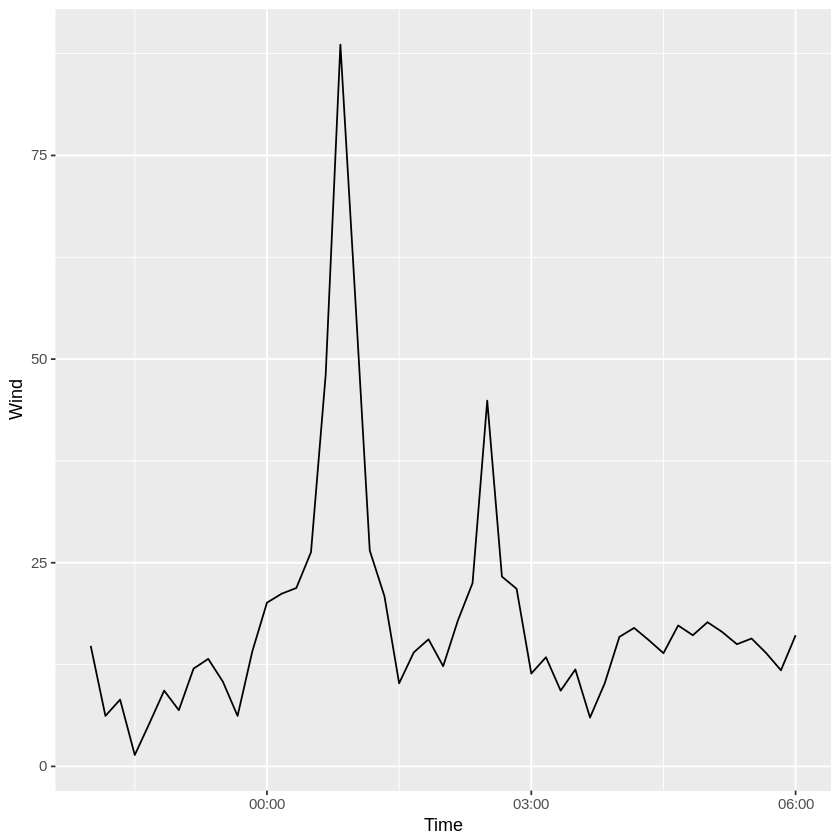

In [10]:
cepagri.microexplosion <- time_window(cepagri, "04/06/2016-22:00", "05/06/2016-6:00")

p <- ggplot(cepagri.microexplosion, aes(y = Wind, x = Time))
p <- p + geom_line()
p <- p + theme(legend.position="none")
p

De acordo com os dados do Cepagri, houve sim muito vento nesta data (88km/h), mas n√£o o suficiente para atingir o limite de 100km/h definido (arbitrariamente) na an√°lise anterior.

Acredito que isso deva ter ocorrido porque a medi√ß√£o do Cepagri n√£o foi realizada no centro da tempestade. (Onde ela √© feita? No pr√≥prio pr√©dio do Cepagri?)

# Correla√ß√µes

Vamos visualizar como a Temperatura, Vento, Umidade e Sensa√ß√£o T√©rmica se correlacionam.

Temperature Apparent.Temperature Wind         Humidity    
Temperature           1.0000000   0.9031287           -0.164425429 -0.623340798
Apparent.Temperature  0.9031287   1.0000000           -0.267358278 -0.464479529
Wind                 -0.1644254  -0.2673583            1.000000000  0.003857735
Humidity             -0.6233408  -0.4644795            0.003857735  1.000000000

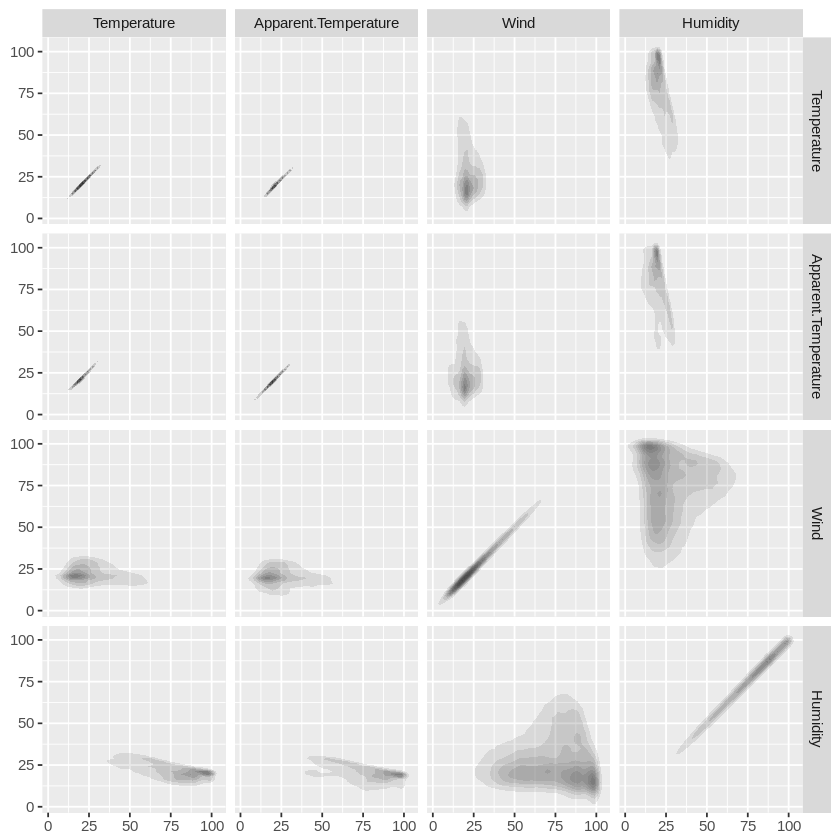

In [11]:
correlation.attributes <- c('Temperature', 'Apparent.Temperature', 'Wind', 'Humidity')

correlation.matrix <- matrix(ncol=length(correlation.attributes), nrow=length(correlation.attributes), dimnames=list(correlation.attributes, correlation.attributes))
for (i in 1:length(correlation.attributes)) {
    for (j in 1:length(correlation.attributes)) {
        correlation.matrix[i,j] <- cor(cepagri[[correlation.attributes[i]]], cepagri[[correlation.attributes[j]]])
    }
}
correlation.matrix

density.grid <- data.frame(var1=c(), value1=c(), var2=c(), value2=c())
for (var1 in correlation.attributes) {
    for (var2 in correlation.attributes) {
        df <- data.frame(var1=var1, value1=cepagri[[var1]], var2=var2, value2=cepagri[[var2]])
        density.grid <- rbind(density.grid, df)
    }
}

p <- ggplot(data=density.grid, aes(x=value1, y=value2))
p <- p + facet_grid(var1 ~ var2)
p <- p + stat_density2d(aes(alpha=..level..), geom="polygon")
p <- p + theme(legend.position="none",  axis.title = element_blank())
p

Exceto pela diagonal principal, esses dados n√£o mostram _linhas_ ou mesmo _elipses_ bonitinhas como as que eu gostaria de ter encontrado, um sinal de que modelar o clima √© um problema complicado e que requer modelos bem mais complexos do correla√ß√µes simples.

Mas apesar disso, podemos notar que:
- Obviamente, _Temperatura_ e _Sensa√ß√£o T√©rmica_ s√£o altamente correlacionados. Eu n√£o fa√ßo id√©ia de como se calcula a sensa√ß√£o t√©rmica, mas um n√∫mero muito pr√≥ximo de 1 j√° era esperado.
- _Temperatura_ e _Vento_ possuem uma pequena correla√ß√£o negativa. Acredito que o vento ajude a dispersar o calor.
- _Sensa√ß√£o T√©rmica_ tamb√©m possui uma correla√ß√£o negativa com _Vento_, mas muito mais significativa do que a da _Temperatura_. Neste caso, acredito que o vento possui 2 efeitos aditivos: Ele baixa tanto a _Temperatura_ real quanto a _Sensa√ß√£o T√©rmica_ para uma dada temperatura.
- _Umidade_ e _Temperatura_ possuem uma correla√ß√£o negativa muito alta. Acredito que isso seja explicado porque a umidade √© mais alta em dias nublados e chuvosas, nos quais as nuvens bloqueiam o sol (Diminuindo a temperatura) e a chuva absorve calor do ar e do ch√£o ao cair.
- Interessante, o efeito da _Umidade_ na _Sensa√ß√£o T√©rmica_ √© menos acentuado do que na _Temperatura_. Acredito que o aumento da umidade aumente a _Sensa√ß√£o T√©rmica_ (pois diminui a capacidade do corpo de resfriar por transpira√ß√£o), mas que este efeito n√£o seja suficiente para compensar a influencia da _Umidade_ na _Temperatura_ real.
- Vento e Umidade n√£o possuem correla√ß√£o significativa. Isso me surpreendeu, uma vez que ambos parecem estar associados a dias de tempestades.

√â claro que as explica√ß√µes dados acima s√£o apenas palpites. As an√°lises foram superficiais, eu n√£o possuo conhecimentos suficientes no assunto e, √© claro, correla√ß√£o n√£o implica causalidade.

![XKCD 552 - Correlation](https://imgs.xkcd.com/comics/correlation.png)

# Tendencias sazonais e por hor√°rio

Vamos acompanhar como a _Temperatura_, _Umidade_ e _Vento_ variam em fun√ß√£o das esta√ß√µes do ano e hora do dia.

## Tendencias sazonais

Vamos acompanhar como a _Temperatura_, _Umidade_ e _Vento_ variam em fun√ß√£o das esta√ß√µes do ano, em anos diferentes.

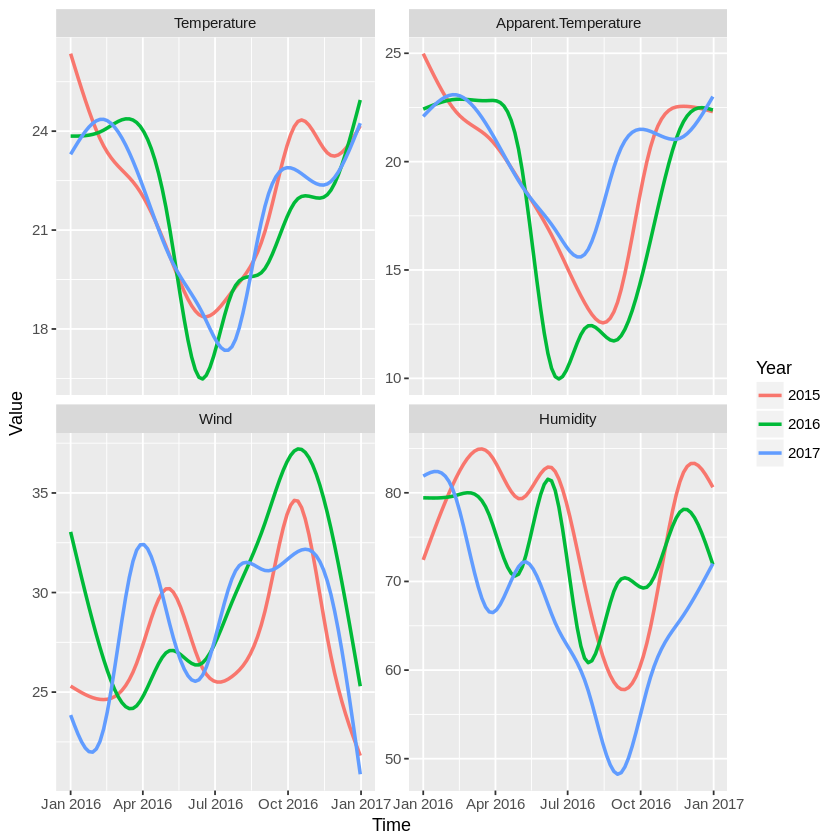

In [17]:
p <- ggplot(data=cepagri.facet, aes(x = Time, y = Value, color = Year, fill = Year, group = Year))
p <- p + facet_wrap(~ Attribute, ncol=2, scales = "free_y")
p <- p + geom_smooth(se = F, method = 'gam', formula = y ~ s(x, bs = "cs"))
p

Atrav√©s destes gr√°ficos, podemos observar que as medi√ß√µes variam bastante durante o ano, mas possuem uma tendencia clara que √© consistente entre anos diferentes.

Como esper√°vamos, a _Temperatura_ e _Sensa√ß√£o T√©rmica_ s√£o bem mais altas nos primeiros e √∫ltimos meses do ano devido ao ver√£o, e mais baixa nos meses do meio, devido ao inverno.

Outra medida que n√£o surpreendeu foi a umidade, caindo consideravelmente a partir da metade do ano, quando come√ßa nossa √©poca de estiagem.

Quanto ao vento, seu padr√£o de comportamente sazonal n√£o est√° t√£o claro quanto os demais par√¢metros, mas parece  que outubro √© a melhor √©poca para empinar pipas, seguido de maio ;)

## Tendencias de hor√°rio

Vamos comparar tamb√©m como a hora do dia influencia as diferentes medidas.

(Para evitar problemas com o hor√°rio de ver√£o, os hor√°rios est√£o sempre em UTC-3)

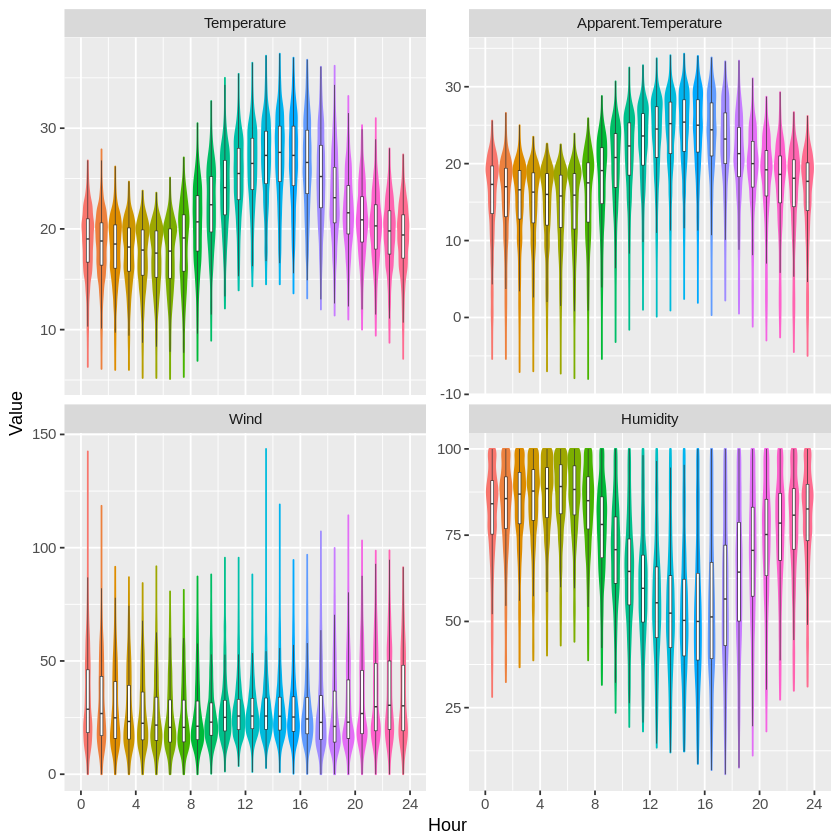

In [13]:
p <- ggplot(data=cepagri.facet, aes(x = as.numeric(Hour)-0.5, y = Value, group = Hour))
p <- p + facet_wrap(~ Attribute, ncol = 2, scales = "free_y")
p <- p + geom_violin(aes(x = as.numeric(Hour)-0.5, color = Hour, fill = Hour))
p <- p + geom_boxplot(width=0.2, outlier.shape = NA, lwd=0.2)
p <- p + theme(legend.position="none")
p <- p + labs(x = "Hour")
p <- p + scale_x_continuous(breaks=seq(0, 24, 4), limits=c(0,24))
p

Neste gr√°fico, podemos ver claramente que a temperatura (Tanto real quanto a sensa√ß√£o t√©rmica) come√ßa a subir logo ap√≥s o nascer do sol, cerca de 6h, atinge o m√°ximo aproximadamente √†s 14h, e volta a cair rapidamente no fim da tarde e mais lentamente durante a madrugada, chegando ao m√≠nimo por volta das 5h.

A Umidade √© influenciada de forma oposta: Come√ßa a cair ao nascer do sol e continua caindo at√© as 15h, quando atinge seu minimo e come√ßa a aumentar novamente. Note que este compartamento √© consistente com a correla√ß√£o negativa que obtivemos antes entre temperatura e umidade, mas n√£o apoia a hip√≥tese de causa criada naquele momento.

Quanto ao vento, o hor√°rio parece ter uma influ√™ncia muito menor nele do que nos outros par√¢metros. Apesar da influ√™ncia relativamente pequena, fica claro que venta mais na parte da noite, especialmente por volta das 22h.

## Tendencias sazonais e por hor√°rio simultaneamente

Podemos tamb√©m visualizar a influ√™ncia da Sazonalidade e do Hor√°rio simultaneamente.

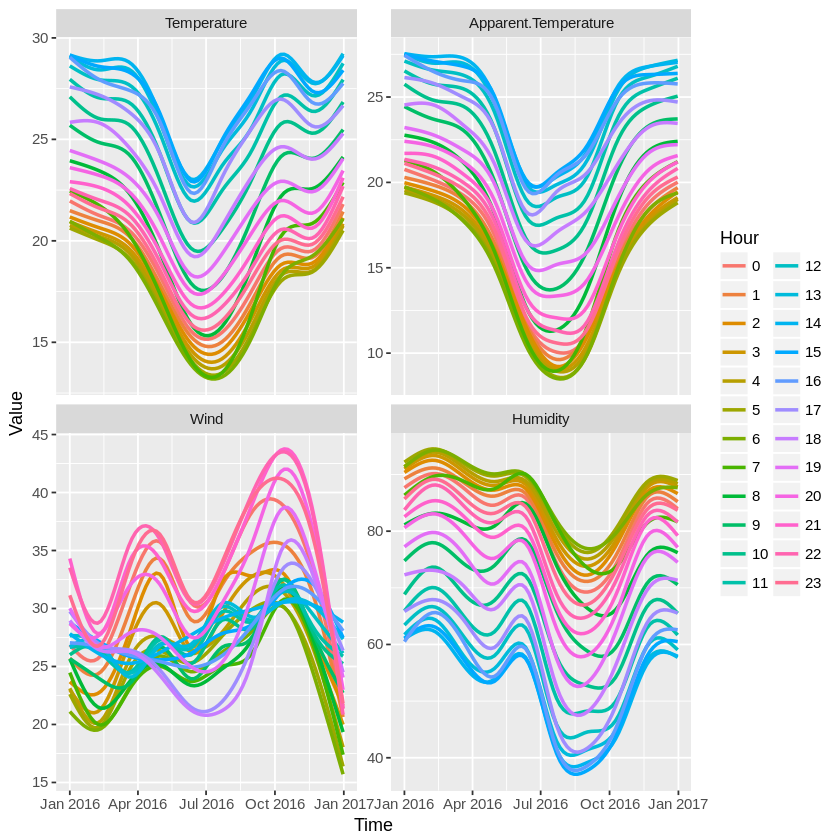

In [18]:
p <- ggplot(data=cepagri.facet, aes(x = Time, y = Value, color = Hour, fill = Hour, group = Hour))
p <- p + facet_wrap(~ Attribute, ncol=2, scales = "free_y")
p <- p + geom_smooth(se = F, method = 'gam', formula = y ~ s(x, bs = "cs"))
p

Apesar de muito bonita, esta visualiza√ß√£o √© bem mais dificil de ler, uma vez que h√° muita informa√ß√£o concentrada e sobreposta.

A influ√™ncia da data e da hor√° s√£o quase independentes na Temperatura (Real e sensa√ß√£o t√©rmica) e na umidade, e podemos chegar nas mesma conclus√µes obtidas anteriormente.

J√° o vento possui uma itera√ß√£o mais complicadas: Confirmando as observa√ß√µes anteriores, as √©pocas de maior ventania ocorrem por volta de Outubro e Maio, e os ventos mais fortes ocorrem sempre por volta das 22h. 

Adicionalmente, neste gr√°fico √© poss√≠vel perceber que as primeiras horas do dia s√£o de calmaria durante o ver√£o e de ventos moderados no inverno, enquanto que o cresp√∫sculo possui vento moderado no ver√£o e calmaria no inverno. Achei essa invers√£o muito interessante, e consistente com minha experi√™ncia pessoal: Durante o ver√£o sempre preciso fechar as janelas no fim da tarde devido √† ventania.